In [1]:
import time

import matplotlib.pyplot as plt 
import numpy as np 
import os 
import pandas as pd 
from sklearn.manifold import TSNE

In [2]:
images = np.load("Kannada_MNIST_npz/Dig_MNIST/X_dig_MNIST.npz")['arr_0']
labels = np.load("Kannada_MNIST_npz/Dig_MNIST/y_dig_MNIST.npz")['arr_0']

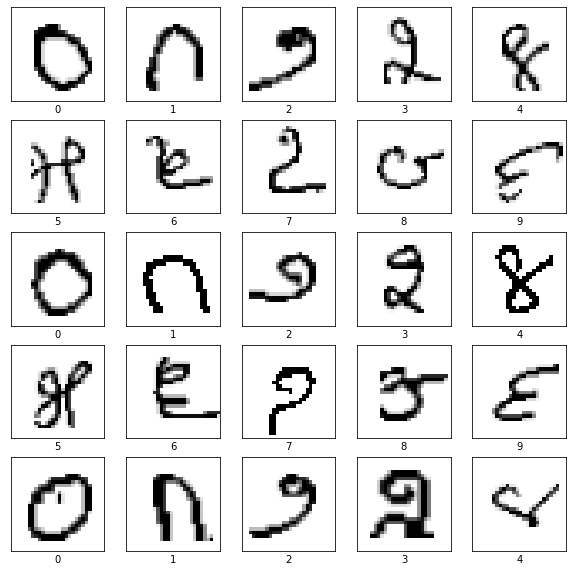

In [3]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap=plt.cm.binary)
    plt.xlabel(labels[i])

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=67)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.05, random_state=71)

In [5]:
import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K

In [6]:
x_train = np.expand_dims(X_train, axis=-1)
x_test = np.expand_dims(X_test, axis=-1)
x_valid = np.expand_dims(X_valid, axis=-1)
y_valid = keras.utils.to_categorical(y_valid)
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [7]:
img_rows, img_cols = 28, 28
batch_size = 128
num_classes = 10
epochs = 12

In [8]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(img_rows, img_cols, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [9]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 7782 samples, validate on 2048 samples
Epoch 1/12
7782/7782 [==============================] - 2s 266us/sample - loss: 4.0589 - acc: 0.4121 - val_loss: 0.6862 - val_acc: 0.8223
Epoch 2/12
7782/7782 [==============================] - 1s 124us/sample - loss: 0.8763 - acc: 0.7095 - val_loss: 0.3273 - val_acc: 0.8994
Epoch 3/12
7782/7782 [==============================] - 1s 129us/sample - loss: 0.5726 - acc: 0.8075 - val_loss: 0.2295 - val_acc: 0.9272
Epoch 4/12
7782/7782 [==============================] - 1s 128us/sample - loss: 0.4470 - acc: 0.8534 - val_loss: 0.2034 - val_acc: 0.9390
Epoch 5/12
7782/7782 [==============================] - 1s 124us/sample - loss: 0.3669 - acc: 0.8712 - val_loss: 0.1887 - val_acc: 0.9399
Epoch 6/12
7782/7782 [==============================] - 1s 123us/sample - loss: 0.3236 - acc: 0.8891 - val_loss: 0.1655 - val_acc: 0.9482
Epoch 7/12
7782/7782 [==============================] - 1s 127us/sample - loss: 0.2804 - acc: 0.9034 - val_loss: 0.1639 - va